In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
netflix_dataset = pd.read_csv('/content/drive/MyDrive/netflix/combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [5]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles-1 (1).csv to netflix_titles-1 (1) (2).csv


In [6]:
df_title = pd.read_csv('netflix_titles-1 (1).csv', usecols=[0, 1, 2, 3], names=['Movie_Id', 'Year', 'Name', 'Genre'])


In [7]:
df_title.head()

,Movie_Id,Year,Name,Genre
0,ID,Movie Name,Rating,Genre
1,s1,Dick Johnson Is Dead,PG-13,Documentaries
2,s2,Blood & Water,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
3,s3,Ganglands,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
4,s4,Jailbirds New Orleans,TV-MA,"Docuseries, Reality TV"


In [8]:
df_title = pd.read_csv('netflix_titles-1 (1).csv', skiprows=1, names=['Movie_Id', 'Name', 'Rating', 'Genre'])


In [9]:
df_title.head()

,Movie_Id,Name,Rating,Genre
0,s1,Dick Johnson Is Dead,PG-13,Documentaries
1,s2,Blood & Water,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,Ganglands,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,Jailbirds New Orleans,TV-MA,"Docuseries, Reality TV"
4,s5,Kota Factory,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."


In [10]:
df_title['Movie_Id'] = df_title['Movie_Id'].str.extract('(\d+)').astype(int)


In [11]:
df_title.info()
df_title.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_Id  8807 non-null   int64 
 1   Name      8807 non-null   object
 2   Rating    8803 non-null   object
 3   Genre     8807 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.3+ KB


,Movie_Id,Name,Rating,Genre
0,1,Dick Johnson Is Dead,PG-13,Documentaries
1,2,Blood & Water,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,3,Ganglands,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,4,Jailbirds New Orleans,TV-MA,"Docuseries, Reality TV"
4,5,Kota Factory,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."


In [12]:
df_title[df_title['Rating'].isnull()]


,Movie_Id,Name,Rating,Genre
5989,5990,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Movies
6827,6828,Gargantia on the Verdurous Planet,NaN,"Anime Series, International TV Shows"
7312,7313,Little Lunch,NaN,"Kids' TV, TV Comedies"
7537,7538,My Honor Was Loyalty,NaN,Dramas


In [13]:
df_title = df_title.dropna(subset=['Rating'])
df_title.reset_index(drop=True, inplace=True)  # Reset index after dropping


In [14]:
movie_rows = netflix_dataset["Cust_Id"].astype(str).str.contains(":", regex=False, na=False)
print(movie_rows.sum())  # Number of movie ID rows
print(netflix_dataset[movie_rows].head(10))  # Sample of those rows


4499
      Cust_Id  Rating
0          1:     NaN
548        2:     NaN
694        3:     NaN
2707       4:     NaN
2850       5:     NaN
3991       6:     NaN
5011       7:     NaN
5105       8:     NaN
20016      9:     NaN
20112     10:     NaN


In [15]:
# Step 1: Identify movie rows and remove colon
netflix_dataset.loc[movie_rows, "Movie_Id"] = netflix_dataset.loc[movie_rows, "Cust_Id"].str.replace(":", "", regex=True)

# Step 2: Convert Movie_Id column to numeric
netflix_dataset["Movie_Id"] = netflix_dataset["Movie_Id"].ffill().astype(float)

# Step 3: Remove original movie identifier rows
netflix_dataset = netflix_dataset[~movie_rows]

# Step 4: Convert Cust_Id to integer
netflix_dataset["Cust_Id"] = netflix_dataset["Cust_Id"].astype(int)

# Display cleaned dataset
print(netflix_dataset.head(10))
print(netflix_dataset.dtypes)


    Cust_Id  Rating  Movie_Id
1   1488844     3.0       1.0
2    822109     5.0       1.0
3    885013     4.0       1.0
4     30878     4.0       1.0
5    823519     3.0       1.0
6    893988     3.0       1.0
7    124105     4.0       1.0
8   1248029     3.0       1.0
9   1842128     4.0       1.0
10  2238063     3.0       1.0
Cust_Id       int64
Rating      float64
Movie_Id    float64
dtype: object


<ipython-input-15-a9085fae2484>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset["Cust_Id"] = netflix_dataset["Cust_Id"].astype(int)


In [16]:
print(netflix_dataset.isna().sum())  # Check for missing values
print(netflix_dataset.duplicated().sum())  # Check for duplicate rows
print(netflix_dataset.describe())  # Summary statistics


Cust_Id     0
Rating      0
Movie_Id    0
dtype: int64
0
            Cust_Id        Rating      Movie_Id
count  2.405376e+07  2.405376e+07  2.405376e+07
mean   1.322285e+06  3.599634e+00  2.308324e+03
std    7.645779e+05  1.086118e+00  1.303909e+03
min    6.000000e+00  1.000000e+00  1.000000e+00
25%    6.609270e+05  3.000000e+00  1.180000e+03
50%    1.318602e+06  4.000000e+00  2.342000e+03
75%    1.984358e+06  4.000000e+00  3.433000e+03
max    2.649429e+06  5.000000e+00  4.499000e+03


In [17]:
df_title.head()


,Movie_Id,Name,Rating,Genre
0,1,Dick Johnson Is Dead,PG-13,Documentaries
1,2,Blood & Water,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,3,Ganglands,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,4,Jailbirds New Orleans,TV-MA,"Docuseries, Reality TV"
4,5,Kota Factory,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."


In [18]:
print(df_title['Genre'].unique()[:20])  # Show first 20 unique genres
print(df_title.info())  # Check dataset structure


['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8803 entries, 0 to 8802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  -

In [19]:
print(netflix_dataset.head())
print(netflix_dataset.info())


   Cust_Id  Rating  Movie_Id
1  1488844     3.0       1.0
2   822109     5.0       1.0
3   885013     4.0       1.0
4    30878     4.0       1.0
5   823519     3.0       1.0
<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  float64
dtypes: float64(2), int64(1)
memory usage: 734.1 MB
None


In [20]:
# Convert Movie_Id to int
netflix_dataset['Movie_Id'] = netflix_dataset['Movie_Id'].astype(int)

# Merge ratings with movie titles dataset
df_merged = df_title.merge(netflix_dataset, on='Movie_Id')

# Check the first few rows
print(df_merged.head())


<ipython-input-20-f68a0160e1ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id'] = netflix_dataset['Movie_Id'].astype(int)


   Movie_Id                  Name Rating_x          Genre  Cust_Id  Rating_y
0         1  Dick Johnson Is Dead    PG-13  Documentaries  1488844       3.0
1         1  Dick Johnson Is Dead    PG-13  Documentaries   822109       5.0
2         1  Dick Johnson Is Dead    PG-13  Documentaries   885013       4.0
3         1  Dick Johnson Is Dead    PG-13  Documentaries    30878       4.0
4         1  Dick Johnson Is Dead    PG-13  Documentaries   823519       3.0


In [21]:
popular_genres = df_merged['Genre'].value_counts()
print(popular_genres.head(10))  # Top 10 popular genres


Genre
Dramas, International Movies                            951650
Comedies, Dramas, International Movies                  720848
Dramas, Independent Movies, International Movies        718703
Children & Family Movies, Comedies                      715868
Children & Family Movies                                675101
Documentaries                                           657881
Stand-Up Comedy                                         629251
Dramas, International Movies, Romantic Movies           625137
Kids' TV                                                591962
International TV Shows, Romantic TV Shows, TV Dramas    459019
Name: count, dtype: int64


In [22]:
liked_genres = df_merged.groupby('Genre')['Rating_y'].mean().sort_values(ascending=False)
print(liked_genres.head(10))  # Top 10 highest-rated genres


Genre
British TV Shows, Reality TV, Romantic TV Shows                 4.581296
Action & Adventure, Anime Features, Children & Family Movies    4.348818
Comedies, Dramas, Music & Musicals                              4.294857
Independent Movies, International Movies, Thrillers             4.291031
International TV Shows, Romantic TV Shows, TV Mysteries         4.240995
Horror Movies, Independent Movies, Thrillers                    4.201496
British TV Shows, Kids' TV                                      4.162720
Action & Adventure, Anime Features                              4.157901
TV Action & Adventure, TV Dramas, TV Mysteries                  4.145055
Action & Adventure, Independent Movies, International Movies    4.144161
Name: Rating_y, dtype: float64


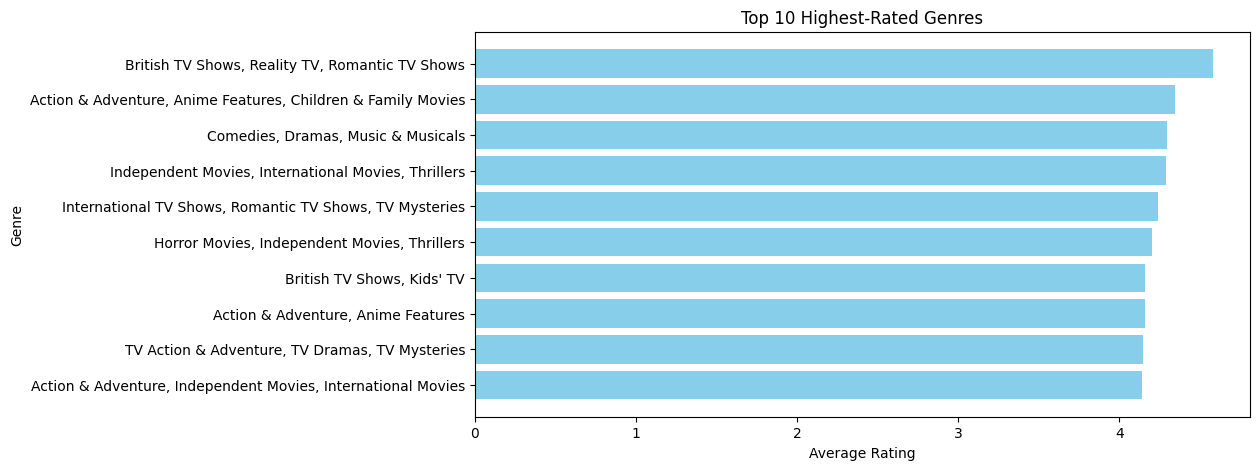

In [23]:
import matplotlib.pyplot as plt

# Plot the top 10 highest-rated genres
top_genres = liked_genres.head(10)  # Using 'liked_genres' instead of 'genre_ratings'

plt.figure(figsize=(10, 5))
plt.barh(top_genres.index, top_genres.values, color='skyblue')
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Top 10 Highest-Rated Genres")
plt.gca().invert_yaxis()  # Invert so the highest-rated genre is at the top
plt.show()


In [24]:
!pip install scikit-surprise


In [25]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Reduce dataset size by sampling 100,000 ratings
netflix_sample = netflix_dataset.sample(n=100000, random_state=42)

# Define the reader object with rating scale
reader = Reader(rating_scale=(1, 5))

# Load dataset into Surprise format
data = Dataset.load_from_df(netflix_sample[['Cust_Id', 'Movie_Id', 'Rating']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD model
svd = SVD()
svd.fit(trainset)

# Make predictions
predictions = svd.test(testset)

# Evaluate model performance
rmse = accuracy.rmse(predictions)
print("RMSE:", rmse)


RMSE: 1.0174
RMSE: 1.0174143457416593


In [32]:
print(netflix_dataset.columns)


Index(['Cust_Id', 'Rating'], dtype='object')


In [42]:
print(netflix_dataset.columns)
print(df_title.columns)


Index(['Cust_Id', 'Rating'], dtype='object')
Index(['Movie_Id', 'Name', 'Rating', 'Genre'], dtype='object')


In [56]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Load dataset with correct column names
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the SVD model
svd = SVD(n_factors=50, random_state=42)
svd.fit(trainset)

# 🔹 **Function to get movie recommendations for a specific user**
def get_movie_recommendations(user_id, model, df_movies, df_ratings, top_n=10):
    # Get list of movies the user has already rated
    rated_movies = df_ratings[df_ratings['Cust_Id'] == user_id]['Movie_Id'].unique()

    # Get all movie IDs
    all_movie_ids = df_movies['Movie_Id'].unique()

    # Filter out movies the user has already rated
    unrated_movies = [movie for movie in all_movie_ids if movie not in rated_movies]

    # Predict ratings for all unrated movies
    predictions = [model.predict(user_id, movie) for movie in unrated_movies]

    # Sort movies by predicted rating
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get top N recommendations
    top_movies = [pred.iid for pred in predictions[:top_n]]

    # Get movie names for recommendations
    recommended_movies = df_movies[df_movies['Movie_Id'].isin(top_movies)][['Movie_Id', 'Name', 'Genre']]

    return recommended_movies

# 🔹 **Make recommendations for a specific user**
user_id = int(input("Enter User ID: "))  # Get user input
recommendations = get_movie_recommendations(user_id, svd, df_title, netflix_dataset, top_n=10)

# 🔹 **Display results**
print("\nRecommended Movies:")
print(recommendations)


Enter User ID: 54647

Recommended Movies:
   Movie_Id                              Name  \
0         1              Dick Johnson Is Dead   
1         2                     Blood & Water   
2         3                         Ganglands   
3         4             Jailbirds New Orleans   
4         5                      Kota Factory   
5         6                     Midnight Mass   
6         7  My Little Pony: A New Generation   
7         8                           Sankofa   
8         9     The Great British Baking Show   
9        10                      The Starling   

                                               Genre  
0                                      Documentaries  
1    International TV Shows, TV Dramas, TV Mysteries  
2  Crime TV Shows, International TV Shows, TV Act...  
3                             Docuseries, Reality TV  
4  International TV Shows, Romantic TV Shows, TV ...  
5                 TV Dramas, TV Horror, TV Mysteries  
6                           Child

In [58]:
import pandas as pd

# 🔹 Merge ratings with movie genres using Movie_Id
df_merged = netflix_dataset.merge(df_title[['Movie_Id', 'Genre']], on='Movie_Id', how='inner')

# 🔹 Group by Genre and calculate the average rating
genre_ratings = df_merged.groupby('Genre')['Rating'].mean().reset_index()

# 🔹 Sort by Rating to find best and worst-rated genres
best_genres = genre_ratings.sort_values(by='Rating', ascending=False).head(5)   # Top 5 Best Genres
worst_genres = genre_ratings.sort_values(by='Rating', ascending=True).head(5)  # Top 5 Worst Genres

# 🔹 Display results
print("\n Best Rated Genres:")
print(best_genres)

print("\n Worst Rated Genres:")
print(worst_genres)



 Best Rated Genres:
                                                 Genre  Rating
169            Classic Movies, Comedies, Sports Movies     5.0
192            Comedies, Cult Movies, Music & Musicals     5.0
466                                   Sci-Fi & Fantasy     5.0
269                     Cult Movies, Dramas, Thrillers     5.0
45   Action & Adventure, Horror Movies, Independent...     5.0

 Worst Rated Genres:
                                                 Genre  Rating
308                    Docuseries, TV Sci-Fi & Fantasy     1.0
43   Action & Adventure, Faith & Spirituality, Sci-...     1.0
31             Action & Adventure, Cult Movies, Dramas     1.0
315            Dramas, Horror Movies, Music & Musicals     1.0
473  Stand-Up Comedy & Talk Shows, TV Mysteries, TV...     1.0
